#### Preprocesado con distinta proporcion

1. Cambiar Y numeros a solo tener una salida **DONE**
2. Juntar test y train de letras y separar en Y y X **DONE**
3. Reescalar las imagenes de numeros de 64x64 a 28x28 **DONE**
4. Juntar los datos de numeros y los de letras **DONE**
5. Pasar todo el test a one hot encoding **DONE**
6. Separar en train y test. **DONE**

# Preprocesado de los dos conjuntos

## Carga de los datos

El preprocesado de los dos conjuntos por separado ha sido bastante sencillo ya que todas las imágenes tenían las mismas dimensiones y no existían ningún problema en particular. Sin embargo, cuando intentamos unirlos se complica bastante. Las características de los dos conjuntos son dispares:

- **Letras**: 
    - Formato de los ficheros ".csv"
    - Tienen como etiqueta un solo número que indica la letra.
    - Tamaño de las imágenes de 28x28.
    - Conjunto global separado en train y test.
    - Más de 20.000 imágenes
    
- **Numeros**:
    - Formato de los ficheros ".npy"
    - Tienen como etiqueta un array cuya posición indica el número.
    - Tamaño de las imágenes de 64x64.
    - Hay dos ficheros: X.npy con todas las imágenes e Y.npy con todas las labels.
    - 2062 imágenes en total.
    
Todas estas diferencias hacen que el preprocesado sea realmente difícil y tedioso. Tenemos que encontrar aquellas características que permitan juntar los dos conjuntos correctamente para que nos de buenos resultados.

In [1]:
import pandas as pd
import numpy as np
import keras as keras

path_npy = "DatasetsIAO/Unido/"

# Estos tienen solo una sola salida. 24x24
df_letras_train = pd.read_csv("DatasetsIAO/Letras/sign_mnist_train.csv")
df_letras_test = pd.read_csv("DatasetsIAO/Letras/sign_mnist_test.csv")

# Estos están en one hot encoding. 64x64
X_numeros = np.load("DatasetsIAO/NumerosBien/X.npy")
Y_numeros = np.load("DatasetsIAO/NumerosBien/Y.npy")

Using TensorFlow backend.
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/fra

### Transformamos a dataframe el np.array de Numeros

Al igual que hicimos en el preprocesado de los conjuntos de los datos numéricos, vamos a pasar los numpy array obtenidos a partir de los ".npy" para poder manejarlos de una forma mucho más eficiente y sencilla.

In [2]:
X_numeros.shape

(2062, 64, 64)

In [3]:
# Para manejar los dataset de los números, los pasamos a dataframe

# Hacemos el reshape de X_numeros para que solo tenga dos dimensiones
# y pueda ser representado en un dataframe.
X_numeros = X_numeros.reshape(2062, 4096)

# Pasamos tanto Y_numeros como X_numeros a dataframe.
# Es necesario añadir +1 en los nombres de indice y columnas
# que empiecen con 1 para que cuadre con el número de instancias total.
X_numeros = pd.DataFrame(data = X_numeros,
          index=np.arange(1, X_numeros.shape[0] + 1),
          columns=np.arange(0, X_numeros.shape[1]))

Y_numeros = pd.DataFrame(data = Y_numeros,
          index=np.arange(1, Y_numeros.shape[0] + 1),
          columns=np.arange(0, Y_numeros.shape[1]))


In [4]:
X_numeros

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
1,0.474510,0.462745,0.450980,0.431373,0.419608,0.403922,0.392157,0.380392,0.372549,0.356863,...,0.419608,0.431373,0.439216,0.454902,0.466667,0.478431,0.486274,0.501961,0.509804,0.521569
2,0.537255,0.517647,0.513726,0.501961,0.486274,0.482353,0.474510,0.470588,0.462745,0.454902,...,0.509804,0.517647,0.529412,0.541176,0.552941,0.564706,0.576471,0.588235,0.600000,0.607843
3,0.435294,0.427451,0.415686,0.411765,0.396078,0.388235,0.376471,0.368627,0.364706,0.352941,...,0.529412,0.541176,0.556863,0.568627,0.580392,0.596078,0.611765,0.619608,0.631373,0.639216
4,0.537255,0.647059,0.647059,0.470588,0.486274,0.486274,0.482353,0.478431,0.474510,0.462745,...,0.392157,0.400000,0.407843,0.423529,0.435294,0.450980,0.466667,0.486274,0.501961,0.521569
5,0.305882,0.298039,0.294118,0.286274,0.278431,0.274510,0.266667,0.266667,0.258824,0.254902,...,0.439216,0.450980,0.450980,0.454902,0.458824,0.466667,0.466667,0.474510,0.478431,0.482353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.545098,0.537255,0.525490,0.517647,0.513726,0.501961,0.494118,0.478431,0.462745,0.447059,...,0.564706,0.572549,0.580392,0.588235,0.596078,0.603922,0.607843,0.615686,0.623529,0.627451
2059,0.513726,0.498039,0.490196,0.478431,0.458824,0.450980,0.447059,0.443137,0.431373,0.419608,...,0.427451,0.443137,0.458824,0.470588,0.482353,0.494118,0.501961,0.513726,0.525490,0.529412
2060,0.498039,0.486274,0.470588,0.454902,0.439216,0.427451,0.415686,0.400000,0.388235,0.376471,...,0.537255,0.549020,0.556863,0.564706,0.572549,0.576471,0.580392,0.588235,0.592157,0.619608
2061,0.517647,0.498039,0.486274,0.478431,0.466667,0.450980,0.439216,0.427451,0.407843,0.392157,...,0.454902,0.470588,0.478431,0.486274,0.494118,0.501961,0.513726,0.517647,0.529412,0.537255


### Pasamos de One Hot Encoding a Normal

Pasamos las labels del conjunto de los números de One Hot Encoding a un solo dígito. Esto lo hacemos ya que necesitamos poder juntar el conjunto de datos de las letras con el conjunto de datos de números. Si las labels de uno de los conjuntos están codificadas mediante un array y las del otro están codificadas con un solo número, **no cuadrarían las dimensiones de los dataframe**.

In [5]:
# Cambiamos las salidas que están en one hot encoding
# Sumamos 26 ya que luego va juntar los dos dataset. El número del 0 al 9 serán los números del 26 al 35
Y_numeros['Clase'] = Y_numeros.apply(lambda row: np.argmax(row.values) + 26, axis = 1)

# Eliminamos las columnas en one hot encoding
Y_numeros = Y_numeros.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], axis = 1)
# Renombramos la clase para poder concatenarla posteriormente.
#Y_numeros = Y_numeros.rename(columns={'Clase': 0})
Y_numeros

,Clase
1,26
2,26
3,26
4,26
5,26
...,...
2058,35
2059,35
2060,35
2061,35


## Resize de las imagenes a 56x56

Llegados a este punto, tenemos que hacer el **resize de las imágenes**. Lo normal sería pensar que como tenemos imágenes de 28x28 y otras de 64x64, entonces tenemos que hacer más pequeñas las de 64x64. Sin embargo, no vamos a hacer eso ya que creemos que bajar las imágenes a 28x28 hace que **perdamos mucha información** que podemos obtener con 64x64. Además, creemos que las imágenes escaladas a 28x28 desde 64x64 no salen tan bien como nos gustaría, salen demasiado **deformes e indistinguibles**.

En un inicio, pensamos que la mejor forma de no perder información sería mediante la estandarización de todas las imágenes a 64x64. Sin embargo, las imágenes que obtuvimos no eran tan buenas como pensábamos en un inicio. Por ese motivo, decidimos subir las imágenes de 28x28 a 56x56 ya que es una potencia de dos y parece que da mejores resultados. Siguiendo este mismo motivo, las imágenes de 64x64 serán bajadas a 56x56.

Para hacer el downscale de las imágenes vamos a utizar el filtro de interpolación **INTER_LANCZOS4** de la librería **OpenCV**.

### Resize de numeros

In [6]:
# Codigo para hacer resize a 56 de los numeros
imagenesNumeros = X_numeros.to_numpy().reshape(-1, 64, 64)

In [7]:
# Codigo para hacer resize a 56 de los numeros
### import numpy as np
import matplotlib.pyplot as plt
import cv2

newX = []
# Hacemos reshape de todas las imagenes
for img in imagenesNumeros:
    newX.append(cv2.resize(img, dsize=(56, 56), interpolation = cv2.INTER_LANCZOS4))

# Hacemos reshape de las imágenes de nuevo para poder hacer el dataframe
X_numeros = np.asarray(newX).reshape(-1, 3136)

# Volvemos a transformar X_numeros en un dataframe para concatenarlo
X_numeros = pd.DataFrame(data = X_numeros,
          index=np.arange(1, X_numeros.shape[0] + 1),
          columns=np.arange(0, X_numeros.shape[1]))

In [8]:
X_numeros

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
1,0.473627,0.459714,0.443607,0.424375,0.409242,0.394298,0.380648,0.370898,0.350886,0.335514,...,0.402585,0.416222,0.430198,0.439864,0.457457,0.471017,0.481276,0.496372,0.507788,0.520687
2,0.535806,0.515056,0.511451,0.492979,0.483623,0.476440,0.470951,0.462026,0.452767,0.444129,...,0.492065,0.507138,0.516383,0.529849,0.543025,0.556661,0.570084,0.583560,0.597050,0.606877
3,0.434355,0.423692,0.413902,0.403815,0.390051,0.378784,0.368425,0.363300,0.350030,0.343350,...,0.512534,0.526286,0.539691,0.557727,0.570750,0.584962,0.604104,0.616335,0.628265,0.638398
4,0.545224,0.664872,0.581906,0.462167,0.497384,0.485038,0.480042,0.474147,0.457967,0.437849,...,0.385238,0.390432,0.399099,0.408484,0.426183,0.440085,0.458221,0.479169,0.497847,0.520520
5,0.305451,0.296866,0.291936,0.281508,0.276200,0.267530,0.266737,0.258044,0.254042,0.249517,...,0.437993,0.437517,0.449662,0.450825,0.455494,0.461752,0.466301,0.471042,0.477242,0.481855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.544778,0.534286,0.521987,0.516710,0.506162,0.495631,0.478982,0.461353,0.442286,0.428293,...,0.552967,0.562434,0.571591,0.580412,0.589217,0.598867,0.605314,0.611894,0.621788,0.626980
2059,0.512619,0.495033,0.487121,0.467953,0.451995,0.447354,0.443293,0.429735,0.416867,0.400989,...,0.408931,0.424127,0.441302,0.459535,0.472489,0.486625,0.497801,0.508478,0.522827,0.528895
2060,0.496833,0.482094,0.464366,0.446403,0.431088,0.418385,0.400535,0.387170,0.373073,0.359453,...,0.520832,0.533251,0.547347,0.556671,0.565794,0.574014,0.577093,0.586226,0.588674,0.617319
2061,0.516280,0.493771,0.483003,0.472822,0.456041,0.440790,0.428091,0.405646,0.388810,0.375431,...,0.435863,0.450875,0.468523,0.478010,0.487361,0.495812,0.507869,0.515608,0.525642,0.536218


(2062, 3136)


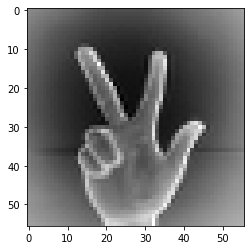

In [9]:
import matplotlib.pyplot as plt
prueba2 = X_numeros.to_numpy().reshape(-1, 56, 56)
print(X_numeros.shape)
plt.imshow(prueba2[720], cmap="gray")

### Resize letras train

In [10]:
Y_letras = df_letras_train['label']
X_letras = df_letras_train.drop('label', axis=1)

In [11]:
imagenesLetras = X_letras.to_numpy().reshape(-1, 28, 28)

In [12]:
### import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

newX = []
# Hacemos reshape de todas las imagenes
for img in imagenesLetras:
    im = Image.fromarray(img.astype('uint8'), 'L')
    im_resized64 = np.asarray(im.resize((56, 56), resample=Image.LANCZOS))

    
    newX.append(im_resized64)

# Hacemos reshape de las imágenes de nuevo para poder hacer el dataframe
X_letras = np.asarray(newX).reshape(-1, 3136)
X_letras = pd.DataFrame(data = X_letras,
          index=np.arange(0, X_letras.shape[0]),
          columns=np.arange(0, X_letras.shape[1]))

In [13]:
Y_letras

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [14]:
datasets = [X_letras, Y_letras]

df_letras_train = pd.concat(datasets, axis = 1)

In [15]:
df_letras_train

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,label
0,106,109,115,121,125,129,133,135,138,140,...,206,206,206,204,204,203,203,202,202,3
1,155,155,157,157,156,156,156,156,156,156,...,182,189,160,116,102,127,149,153,152,6
2,187,187,188,188,188,188,187,187,187,187,...,199,199,197,196,194,194,194,195,195,2
3,211,211,211,211,212,212,212,212,211,211,...,226,225,223,220,229,238,212,171,146,2
4,164,164,166,168,170,170,171,173,175,177,...,170,164,161,166,167,166,171,178,182,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,189,189,190,190,190,190,191,192,...,229,238,221,204,199,214,227,228,227,13
27451,151,151,153,155,157,157,158,158,160,160,...,196,195,195,195,195,195,195,194,194,23
27452,174,174,174,174,174,174,174,174,174,174,...,204,203,203,202,202,200,200,200,200,18
27453,177,178,180,182,184,184,185,185,186,188,...,70,50,45,54,70,80,89,93,94,17


### Resize de letras test

In [16]:
Y_letras = df_letras_test['label']
X_letras = df_letras_test.drop('label', axis=1)

In [17]:
imagenesLetras = X_letras.to_numpy().reshape(-1, 28, 28)

In [18]:
### import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

newX = []
# Hacemos reshape de todas las imagenes
for img in imagenesLetras:
    im = Image.fromarray(img.astype('uint8'), 'L')
    im_resized64 = np.asarray(im.resize((56, 56), resample=Image.LANCZOS))

    
    newX.append(im_resized64)

# Hacemos reshape de las imágenes de nuevo para poder hacer el dataframe
X_letras = np.asarray(newX).reshape(-1, 3136)
X_letras = pd.DataFrame(data = X_letras,
          index=np.arange(0, X_letras.shape[0]),
          columns=np.arange(0, X_letras.shape[1]))

In [19]:
datasets = [X_letras, Y_letras]

df_letras_test = pd.concat(datasets, axis = 1)

In [20]:
df_letras_test

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,label
0,149,149,149,149,150,150,150,150,150,150,...,98,104,107,110,116,121,117,110,104,6
1,126,126,127,129,130,131,132,132,133,133,...,184,184,184,184,184,183,181,180,180,5
2,85,85,87,89,91,93,95,97,102,109,...,226,226,226,225,225,224,223,222,222,10
3,203,203,204,206,207,207,206,206,207,207,...,230,229,230,235,243,250,254,255,255,0
4,188,188,190,192,193,193,194,196,198,200,...,49,50,48,47,45,45,48,52,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,137,133,124,115,110,106,102,102,104,107,...,190,186,180,178,173,168,164,163,163,1
7168,157,157,157,159,160,162,163,165,166,166,...,211,210,210,210,210,209,209,208,208,12
7169,190,190,191,191,190,190,191,191,190,190,...,212,210,210,211,211,210,209,208,208,2
7170,200,202,204,206,208,207,207,209,213,215,...,80,81,85,72,69,73,72,66,62,4


(7172, 3136)


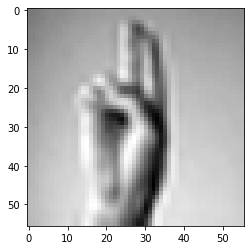

In [21]:
import matplotlib.pyplot as plt
prueba2 = X_letras.to_numpy().reshape(-1, 56, 56)
print(X_letras.shape)
plt.imshow(prueba2[750], cmap="gray")

(7172, 56, 56)


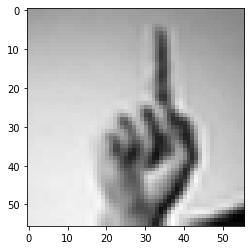

In [22]:
import matplotlib.pyplot as plt
# Hacemos reshape para que pasen de tener una sola dimensión, a tener 2 (de 784 a 28x28).
# Esto es necesario para imprimir la imagen.
prueba2 = X_letras.to_numpy().reshape(-1, 56, 56)
print(prueba2.shape)
plt.imshow(prueba2[1000], cmap="gray")

(2062, 56, 56)


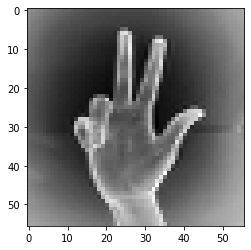

In [23]:
import matplotlib.pyplot as plt
prueba2 = X_numeros.to_numpy().reshape(-1, 56, 56)
print(prueba2.shape)
plt.imshow(prueba2[750], cmap="gray")

In [24]:
df_letras_train['label'].value_counts().sort_index().mean()

1143.9583333333333

In [25]:
Y_numeros.shape

(2062, 1)

### Separamos los números en train, test y validación

#### Aleatorizamos numeros

In [26]:
# Cada vez que se ejecute esta celda, se obtendrá una aleatorización distinta de los datos.

# Concatenamos las columnas para poder manejarlas mejor al hacer shuffle
result = pd.concat([X_numeros, Y_numeros], axis = 1)

from sklearn.utils import shuffle
# Aleatorizamos las imagenes
result = shuffle(result)

# Volvemos a generar los conjuntos X e Y
X_numeros = result.drop('Clase', axis = 1)
Y_numeros = result['Clase']

X_numeros


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
145,0.301317,0.293384,0.291487,0.284081,0.276880,0.274564,0.271117,0.266546,0.260994,0.254232,...,0.395104,0.390719,0.398332,0.394998,0.394141,0.387734,0.394743,0.395610,0.398448,0.403606
143,0.532222,0.513799,0.502685,0.491482,0.480723,0.468758,0.458646,0.449508,0.435852,0.424314,...,0.569437,0.578342,0.587011,0.600218,0.606383,0.622284,0.624241,0.631974,0.640807,0.650291
809,0.497641,0.488578,0.484577,0.469696,0.459458,0.450498,0.431664,0.426314,0.410896,0.397123,...,0.351855,0.368529,0.382586,0.404720,0.417810,0.430155,0.439150,0.445347,0.452533,0.462232
1687,0.473641,0.459618,0.445404,0.426960,0.410970,0.401097,0.392444,0.378946,0.365232,0.353713,...,0.423514,0.432192,0.449613,0.459301,0.476420,0.485943,0.495738,0.505076,0.515629,0.524703
551,0.508958,0.495492,0.486568,0.470957,0.451500,0.441304,0.424575,0.415386,0.415055,0.406022,...,0.722699,0.740635,0.752529,0.794432,0.731592,0.528633,0.549208,0.552585,0.553270,0.578399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.509391,0.499290,0.485814,0.471954,0.460717,0.452288,0.439627,0.426139,0.416391,0.411550,...,0.513529,0.529678,0.539777,0.557054,0.562512,0.573660,0.581837,0.590364,0.600347,0.614905
890,0.317885,0.317796,0.318228,0.315685,0.313748,0.314198,0.313781,0.313720,0.309746,0.310522,...,0.364094,0.364816,0.360914,0.360481,0.361318,0.365418,0.362195,0.363303,0.365090,0.364651
150,0.315075,0.325212,0.341181,0.333774,0.316773,0.340092,0.348805,0.349406,0.349774,0.353614,...,0.462587,0.462773,0.462247,0.466364,0.466835,0.470712,0.470175,0.470354,0.470162,0.470469
401,0.501738,0.495813,0.488880,0.479420,0.473859,0.468292,0.462668,0.457694,0.448128,0.434305,...,0.448150,0.453027,0.461939,0.466921,0.476268,0.482975,0.491354,0.502826,0.514079,0.528614


#### Separamos números en train, test y validación.

In [27]:
import math

nInstanciasTrain = math.ceil(0.6 * X_numeros.shape[0])
nInstanciasVal = math.ceil(0.8 * X_numeros.shape[0])

numeros_train_X = X_numeros[:nInstanciasTrain]
numeros_train_Y = Y_numeros[:nInstanciasTrain]

numeros_val_X = X_numeros[nInstanciasTrain:nInstanciasVal]
numeros_val_Y = Y_numeros[nInstanciasTrain:nInstanciasVal]

numeros_test_X = X_numeros[nInstanciasVal:]
numeros_test_Y = Y_numeros[nInstanciasVal:]

numeros_train_X


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
145,0.301317,0.293384,0.291487,0.284081,0.276880,0.274564,0.271117,0.266546,0.260994,0.254232,...,0.395104,0.390719,0.398332,0.394998,0.394141,0.387734,0.394743,0.395610,0.398448,0.403606
143,0.532222,0.513799,0.502685,0.491482,0.480723,0.468758,0.458646,0.449508,0.435852,0.424314,...,0.569437,0.578342,0.587011,0.600218,0.606383,0.622284,0.624241,0.631974,0.640807,0.650291
809,0.497641,0.488578,0.484577,0.469696,0.459458,0.450498,0.431664,0.426314,0.410896,0.397123,...,0.351855,0.368529,0.382586,0.404720,0.417810,0.430155,0.439150,0.445347,0.452533,0.462232
1687,0.473641,0.459618,0.445404,0.426960,0.410970,0.401097,0.392444,0.378946,0.365232,0.353713,...,0.423514,0.432192,0.449613,0.459301,0.476420,0.485943,0.495738,0.505076,0.515629,0.524703
551,0.508958,0.495492,0.486568,0.470957,0.451500,0.441304,0.424575,0.415386,0.415055,0.406022,...,0.722699,0.740635,0.752529,0.794432,0.731592,0.528633,0.549208,0.552585,0.553270,0.578399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0.485427,0.471900,0.463535,0.454344,0.430924,0.416933,0.404440,0.394554,0.376851,0.364166,...,0.534557,0.490099,0.491385,0.502207,0.506863,0.514635,0.522596,0.534372,0.542793,0.548433
997,0.504695,0.486606,0.473559,0.461013,0.441761,0.425399,0.412383,0.398402,0.384300,0.366709,...,0.466265,0.482144,0.496741,0.505832,0.520222,0.531773,0.542282,0.554413,0.562136,0.575588
1825,0.438930,0.435318,0.438473,0.429753,0.414911,0.408293,0.404064,0.394580,0.377126,0.365249,...,0.453546,0.465161,0.469986,0.478667,0.487895,0.495181,0.501765,0.508566,0.514670,0.528572
114,0.473981,0.462888,0.445323,0.433921,0.413749,0.401027,0.388398,0.378772,0.364752,0.353413,...,0.478114,0.487837,0.496862,0.506024,0.515303,0.522230,0.530990,0.539790,0.546391,0.556302


### Oversampleamos el conjunto de entrenamiento de X_numeros

Como ya hemos mencionado al inicio de este documento, la cantidad de imágenes que tenemos en el conjunto de letras es bastante más elevada que la de números. Esto supone un problema bastante típico en la aplicación de redes de neuronas; **las clases no están representadas en igual medida**. Esto no solo hace que las clases poco representadas no puedan generalizar tan bien como las más representadas (debido a los posibles cambios en las imágenes) sino que puede ser que en test tengamos una cantidad de imágenes poco representadas que sea ínfima. ***Esto puede llegar a ocultar la performance verdadera de la red de neuronas.**

Para afrontar este problema, hemos decidido **duplicar imágenes del conjunto de los números**. Rápidamente, cualquiera se puede dar cuenta de que esto es un problema ya que si tenemos un conjunto de entrenamiento con imágenes duplicadas, puede ocurrir que la red se las aprenda y no sea capaz de generalizar. Para combatir este problema, vamos a aplicar **Data Augmentation** al entrenar la red de neuronas. En el siguiente fragmento de código, duplicamos las imágenes de números para que cada clase esté en la misma proporcion que las de letras.

In [28]:
numeros_train_Y.value_counts().sort_index().mean()

123.8

In [29]:
# result: Contiene la imagen del dataframe que no se va a modificar
# y del que se van a ir obteniendo los grupos de imagenes para duplicar.
#
# numerosUnido: Dataframe en el que se van a ir concatenando los numeros
# duplicados.
result = pd.concat([numeros_train_X, numeros_train_Y], axis = 1)
numerosUnido = pd.concat([numeros_train_X, numeros_train_Y], axis = 1)

clases = list(range(26, 36))
# Iteramos por todas las clases.
for clase in clases:
    # Duplicamos 6 veces cada imagen de cada clase.
    for i in range(9):
        dataframes = [numerosUnido, result[result['Clase'] == clase]]
        numerosUnido = pd.concat(dataframes, ignore_index = True)
        
# Separamos el conjunto de datos en los conjuntos X (imagenes) e Y (labels)
numeros_train_Y = numerosUnido['Clase']
numeros_train_X = numerosUnido.drop('Clase', axis=1)



## Aleatorización de imagenes de test y validación de letras

In [30]:
# Cada vez que se ejecute esta celda, se obtendrá una aleatorización distinta de los datos.

from sklearn.utils import shuffle
# Aleatorizamos las imagenes
df_letras_test = shuffle(df_letras_test)

In [31]:
import math

nInstanciasVal = math.ceil(0.5 * df_letras_test.shape[0])

df_letras_val = df_letras_test[:nInstanciasVal]
df_letras_test = df_letras_test[nInstanciasVal:]

df_letras_val

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,label
412,136,136,137,139,140,140,141,143,145,147,...,14,15,15,14,12,11,14,18,20,3
6318,212,212,212,212,214,214,213,213,213,213,...,229,228,228,232,233,236,239,241,242,0
3665,8,16,30,40,40,41,46,50,54,61,...,165,165,165,165,165,166,166,166,166,1
5616,232,232,233,233,233,233,235,237,238,238,...,108,109,108,110,112,115,119,123,125,7
1652,172,172,173,174,175,175,175,175,174,174,...,169,161,159,169,187,202,191,168,152,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,172,172,172,172,173,173,173,173,173,173,...,195,189,158,108,70,57,80,107,125,7
260,112,114,117,121,125,128,126,121,111,98,...,148,146,152,156,151,135,110,92,84,10
5109,138,139,141,143,145,147,148,150,151,153,...,113,112,111,112,114,114,114,116,116,10
6762,29,42,64,83,77,48,11,0,12,34,...,154,155,156,157,157,158,158,159,159,10


### Separación de letras en X e Y

In [32]:
letras_train_Y = df_letras_train['label']
letras_train_X = df_letras_train.drop('label', axis=1)

letras_val_Y = df_letras_val['label']
letras_val_X = df_letras_val.drop('label', axis=1)

letras_test_Y = df_letras_test['label']
letras_test_X = df_letras_test.drop('label', axis=1)

letras_test_X

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
2164,181,181,182,182,183,184,185,187,188,190,...,228,228,228,228,229,229,229,228,227,227
2717,142,142,143,145,146,148,150,150,151,152,...,214,214,214,214,215,215,215,214,213,213
1581,67,67,68,70,72,73,75,77,83,89,...,42,32,28,28,31,43,56,50,34,24
2780,188,188,189,191,192,192,193,193,194,194,...,213,213,212,212,211,209,207,205,203,203
4152,86,86,88,90,92,97,105,113,120,126,...,93,74,52,41,42,43,39,33,27,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,71,72,74,76,78,80,85,92,103,113,...,46,49,42,28,16,8,8,19,32,40
5848,167,168,170,172,175,177,180,182,184,184,...,124,124,115,100,85,75,72,74,77,80
1859,141,141,141,144,146,146,145,145,145,145,...,179,179,181,181,182,182,181,181,181,181
6137,225,225,225,225,225,225,225,225,226,225,...,41,45,43,42,41,46,52,52,45,40


## Normalizamos las imagenes de letras

In [33]:
# Normalizamos el dataframe de letras, ya que el dataframe de números 
# estaba normalizado y lo vamos a necesitar para entrenar a la red
# de neuronas correctamente.
import pandas as pd
from sklearn import preprocessing

letras_train_X = letras_train_X.astype('float32')
letras_train_X /= 255.0

letras_test_X = letras_test_X.astype('float32')
letras_test_X /= 255.0

letras_val_X = letras_val_X.astype('float32')
letras_val_X /= 255.0

In [34]:
letras_val_X

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
412,0.533333,0.533333,0.537255,0.545098,0.549020,0.549020,0.552941,0.560784,0.568627,0.576471,...,0.027451,0.054902,0.058824,0.058824,0.054902,0.047059,0.043137,0.054902,0.070588,0.078431
6318,0.831373,0.831373,0.831373,0.831373,0.839216,0.839216,0.835294,0.835294,0.835294,0.835294,...,0.909804,0.898039,0.894118,0.894118,0.909804,0.913725,0.925490,0.937255,0.945098,0.949020
3665,0.031373,0.062745,0.117647,0.156863,0.156863,0.160784,0.180392,0.196078,0.211765,0.239216,...,0.647059,0.647059,0.647059,0.647059,0.647059,0.647059,0.650980,0.650980,0.650980,0.650980
5616,0.909804,0.909804,0.913725,0.913725,0.913725,0.913725,0.921569,0.929412,0.933333,0.933333,...,0.415686,0.423529,0.427451,0.423529,0.431373,0.439216,0.450980,0.466667,0.482353,0.490196
1652,0.674510,0.674510,0.678431,0.682353,0.686275,0.686275,0.686275,0.686275,0.682353,0.682353,...,0.678431,0.662745,0.631373,0.623529,0.662745,0.733333,0.792157,0.749020,0.658824,0.596078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,0.674510,0.674510,0.674510,0.674510,0.678431,0.678431,0.678431,0.678431,0.678431,0.678431,...,0.752941,0.764706,0.741176,0.619608,0.423529,0.274510,0.223529,0.313726,0.419608,0.490196
260,0.439216,0.447059,0.458824,0.474510,0.490196,0.501961,0.494118,0.474510,0.435294,0.384314,...,0.588235,0.580392,0.572549,0.596078,0.611765,0.592157,0.529412,0.431373,0.360784,0.329412
5109,0.541176,0.545098,0.552941,0.560784,0.568627,0.576471,0.580392,0.588235,0.592157,0.600000,...,0.443137,0.443137,0.439216,0.435294,0.439216,0.447059,0.447059,0.447059,0.454902,0.454902
6762,0.113725,0.164706,0.250980,0.325490,0.301961,0.188235,0.043137,0.000000,0.047059,0.133333,...,0.596078,0.603922,0.607843,0.611765,0.615686,0.615686,0.619608,0.619608,0.623529,0.623529


## Juntamos los dos dataset y randomizamos las instancias

In [35]:
unido_train_X = [letras_train_X, numeros_train_X]
unido_train_Y = [letras_train_Y, numeros_train_Y]

unido_test_X = [letras_test_X, numeros_test_X]
unido_test_Y = [letras_test_Y, numeros_test_Y]

unido_val_X = [letras_val_X, numeros_val_X]
unido_val_Y = [letras_val_Y, numeros_val_Y]

unido_train_X = pd.concat(unido_train_X, ignore_index = True)
unido_train_Y = pd.concat(unido_train_Y, ignore_index = True)

unido_test_X = pd.concat(unido_test_X, ignore_index = True)
unido_test_Y = pd.concat(unido_test_Y, ignore_index = True)

unido_val_X = pd.concat(unido_val_X, ignore_index = True)
unido_val_Y = pd.concat(unido_val_Y, ignore_index = True)

In [36]:
unido_test_Y

0       17
1       19
2        1
3        6
4       22
        ..
3993    27
3994    30
3995    26
3996    27
3997    33
Length: 3998, dtype: int64

## Preparamos las imágenes y las pasamos a One Hot Encoding

In [37]:
# Hacemos el reshape para que las imagenes tengan el tamaño correcto
unido_train_X = unido_train_X.values.reshape(unido_train_X.shape[0], 56, 56, 1)
unido_test_X = unido_test_X.values.reshape(unido_test_X.shape[0], 56, 56, 1)
unido_val_X = unido_val_X.values.reshape(unido_val_X.shape[0], 56, 56, 1)

from keras.utils.np_utils import to_categorical
unido_train_Y = to_categorical(unido_train_Y.values)
unido_test_Y = to_categorical(unido_test_Y)
unido_val_Y = to_categorical(unido_val_Y)

In [38]:
unido_train_X

array([[[[0.41568628],
         [0.42745098],
         [0.4509804 ],
         ...,
         [0.6666667 ],
         [0.6627451 ],
         [0.6627451 ]],

        [[0.41960785],
         [0.43137255],
         [0.4509804 ],
         ...,
         [0.6666667 ],
         [0.6627451 ],
         [0.6627451 ]],

        [[0.42745098],
         [0.4392157 ],
         [0.45882353],
         ...,
         [0.67058825],
         [0.6666667 ],
         [0.6666667 ]],

        ...,

        [[0.5529412 ],
         [0.56078434],
         [0.5803922 ],
         ...,
         [0.79607844],
         [0.7921569 ],
         [0.7921569 ]],

        [[0.5529412 ],
         [0.56078434],
         [0.5803922 ],
         ...,
         [0.79607844],
         [0.7921569 ],
         [0.7921569 ]],

        [[0.5529412 ],
         [0.56078434],
         [0.5803922 ],
         ...,
         [0.79607844],
         [0.7921569 ],
         [0.7921569 ]]],


       [[[0.60784316],
         [0.60784316],
         [0.61

In [39]:
unido_val_Y.shape

(3998, 36)

Hay un total de 36 columnas por los siguientes motivos:

- En total, el alfabeto tiene 26 letras. Hay dos que no podemos clasificar: la j y la z. La z no supone un problema ya que se encuentra al final, por lo que directamente no se tiene en cuenta. La j, al estar en el medio, el dataset se salta la etiqueta que debería tener. Esto hace que aun teniendo 24 etiquetas posibles, el array generado al hacer One Hot Encoding, llegue hasta la posición 25.


- Al elegir las nuevas etiquetas de los números, le sumamos 26 debido a que la última etiqueta de las letras es la 25 (por los motivos recién mencionados). Esto hace que 26 + 10 = 36 que es el número de posibles valores que tenemos.

## Ejemplos de imágenes generadas

13
(56, 56)


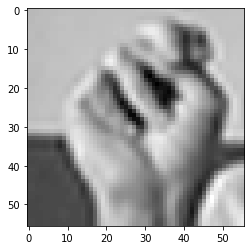

In [40]:
from matplotlib import pyplot as plt

example = unido_train_X[1000].reshape(56, 56)
print(np.argmax(unido_train_Y[1000]))

print(example.shape)
plt.imshow(example, cmap="gray")

1
(56, 56)


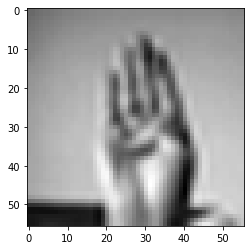

In [41]:
from matplotlib import pyplot as plt

example = unido_val_X[56].reshape(56, 56)
print(np.argmax(unido_val_Y[56]))

print(example.shape)
plt.imshow(example, cmap="gray")

5
(56, 56)


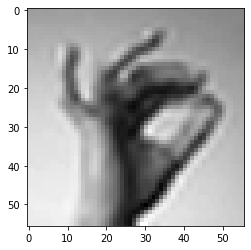

In [42]:
from matplotlib import pyplot as plt
example = unido_test_X[2400].reshape(56, 56)
print(np.argmax(unido_test_Y[2400]))

print(example.shape)
plt.imshow(example, cmap="gray")

27
(56, 56)


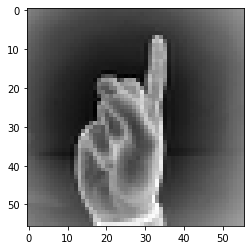

In [43]:
from matplotlib import pyplot as plt
example = unido_train_X[30000].reshape(56, 56)
print(np.argmax(unido_train_Y[30000]))

print(example.shape)
plt.imshow(example, cmap="gray")

In [44]:
np.save(path_npy + "unido_train_X.npy", unido_train_X)
np.save(path_npy + "unido_train_Y.npy", unido_train_Y)
np.save(path_npy + "unido_test_X.npy", unido_test_X)
np.save(path_npy + "unido_test_Y.npy", unido_test_Y)
np.save(path_npy + "unido_val_X.npy", unido_val_X)
np.save(path_npy + "unido_val_Y.npy", unido_val_Y)